# Explore here

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Cargar el dataset original
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

# Eliminar columnas innecesarias
total_data = df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1)
total_data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


Analisis de resultados:

Se eliminan estas variables: 
("id", "name", "host_id", "host_name") porque son identificadoresnada mas 
("last_review", "reviews_per_month") no aportan ningun daato significativo para estudiar el precio

Imprimo y veo el tamaño

In [109]:
total_data.info() # veo los no mulos de mi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [110]:
# VERIFICO SI HAY DATOS NULOS 
total_data.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [111]:
# Veo todas las filas duplicadas en total_data
duplicados = total_data[total_data.duplicated(keep=False)]

print(duplicados)

Empty DataFrame
Columns: [neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365]
Index: []


In [112]:
total_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


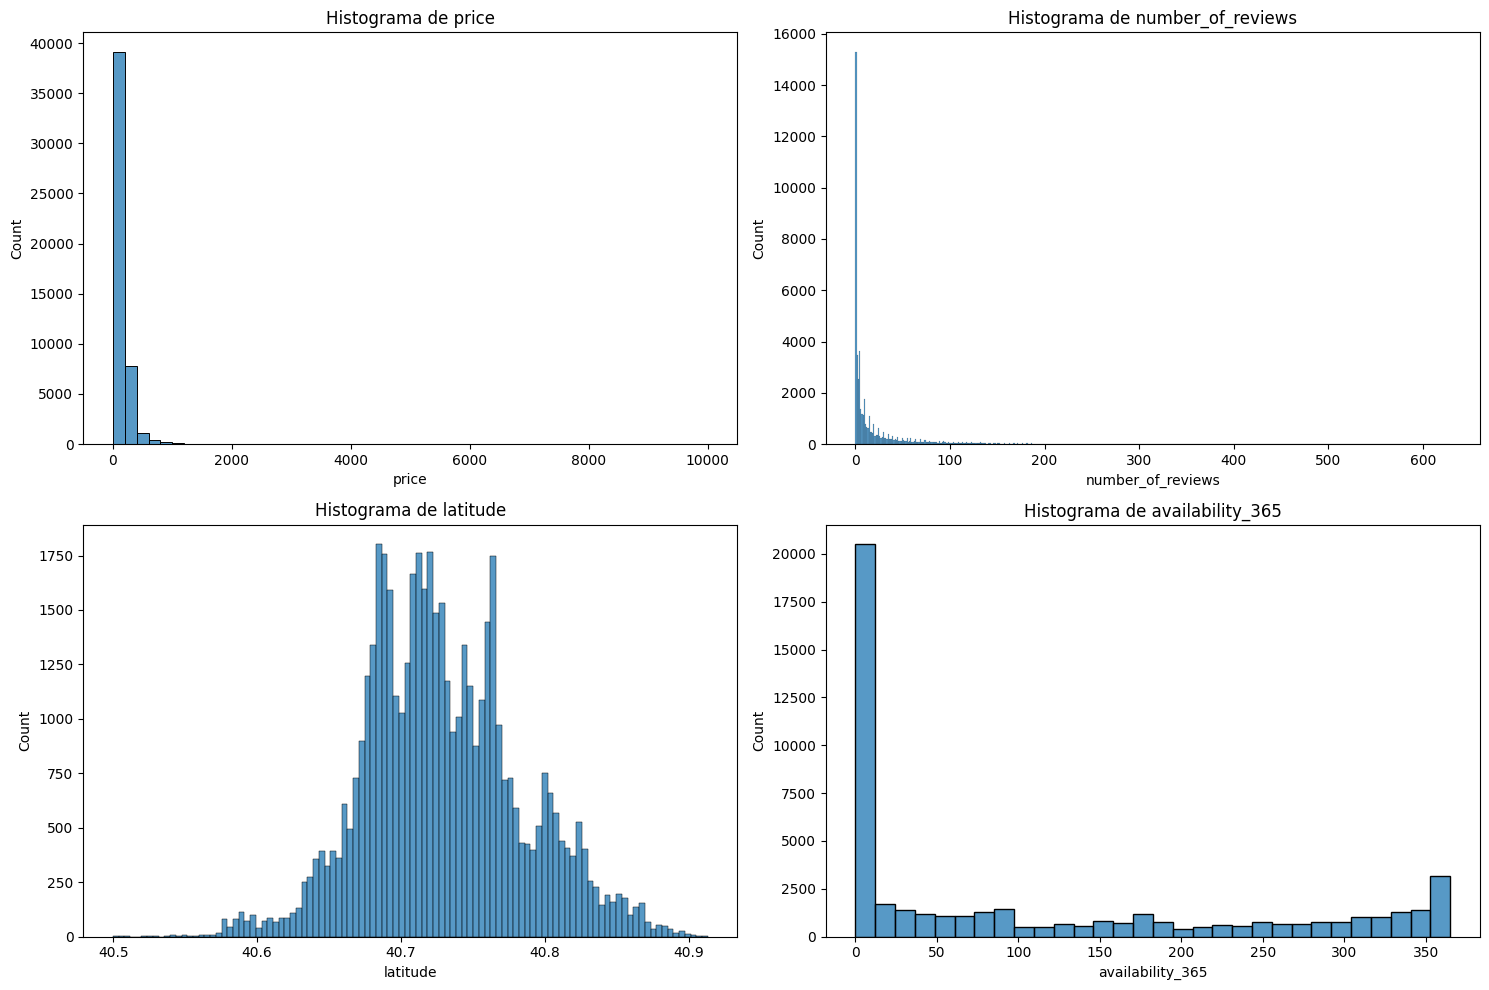

In [113]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

# histograma de price
sns.histplot(ax=axis[0, 0], data=total_data, x="price", bins=50)
axis[0, 0].set_title('Histograma de price')

# Histograma de number_of_reviews
sns.histplot(ax=axis[0, 1], data=total_data, x="number_of_reviews")
axis[0, 1].set_title('Histograma de number_of_reviews')

# Histograma de availability_365
sns.histplot(ax=axis[1, 1], data=total_data, x="availability_365")
axis[1, 1].set_title('Histograma de availability_365')

# Histograma de latitude
sns.histplot(ax=axis[1, 0], data=total_data, x="latitude")
axis[1, 0].set_title('Histograma de latitude')

plt.tight_layout()
plt.show()

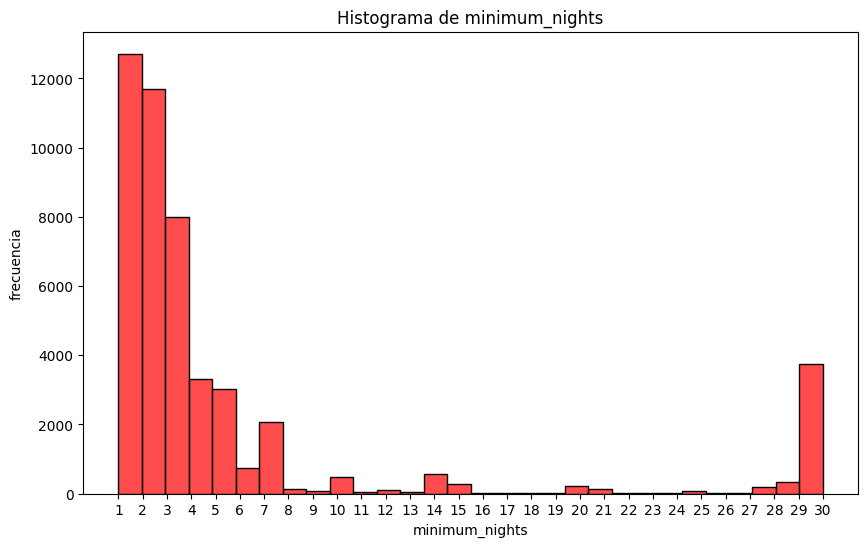

In [114]:
filtered_data =total_data[total_data['minimum_nights'] <= 30] # Filtrar para mostrar solo minimum_nights <= 30

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="minimum_nights", bins=30, color='red', alpha=0.7)
plt.title('Histograma de minimum_nights')
plt.xlabel('minimum_nights')
plt.ylabel('frecuencia')
plt.xticks(range(1, 31))
plt.show()

Analisis de resultados:

1. price:
El histograma de price muestra una concentracion de alojamientos la mayoría por debajo de200 dolares), con cola larga hacia la derecha. Esto indica que la mayoría de los alojamientos son asequibles, pero existen algunos de lujo con precios mucho más altos.

2. number_of_reviews:
La mayoría de los anuncios tienen pocas reseñas, lo que sugiere que muchos listings son nuevos o poco populares. Sin embargo, hay algunos con muchas reseñas, lo que indica que ciertos alojamientos son muy populares o llevan mucho tiempo en la plataforma

3. availability_365:
El histograma de disponibilidad anual muestra que muchos alojamientos estan disponibles todo el año 

4. latitude:
La mayor concentración de estancias suele estar entre 40.7 y 40.8

5. La mayoría de los alojamientos en Airbnb NYC permiten estancias mínimas muy cortas, principalmente de 1, 2 o 3 noches

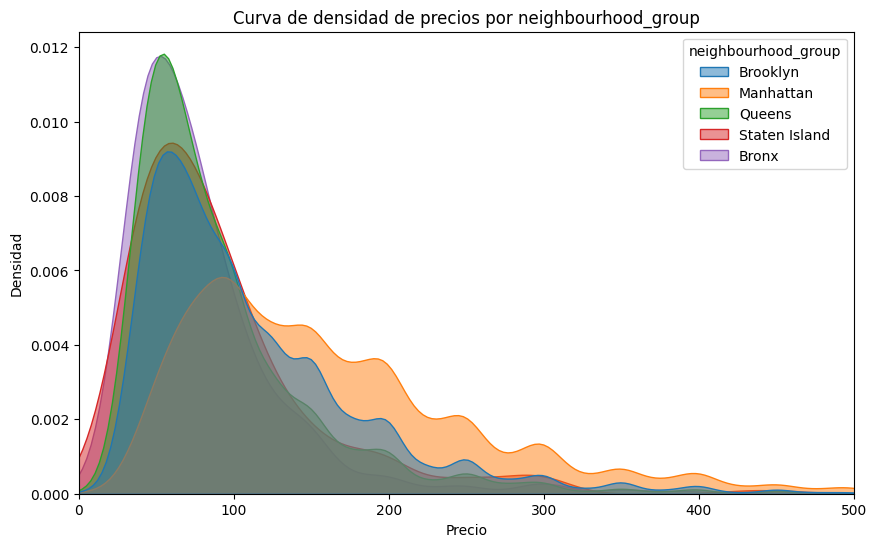

In [115]:
filtered_data = total_data[total_data['price'] < 500]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=filtered_data,
    x='price',
    hue='neighbourhood_group',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('Curva de densidad de precios por neighbourhood_group')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

#Analisis de resultados:
1. Manhattan es un Segmento de lujo y turismo premium, los precios de alquiler son altos 
2. Brooklyn de segunda opcion despues de Manhattan.
3. Bronx es la opcion mas economica para alquiler.
4. Queens/Staten Island son alternativas moderadas con respecto a los precios de alquileres.

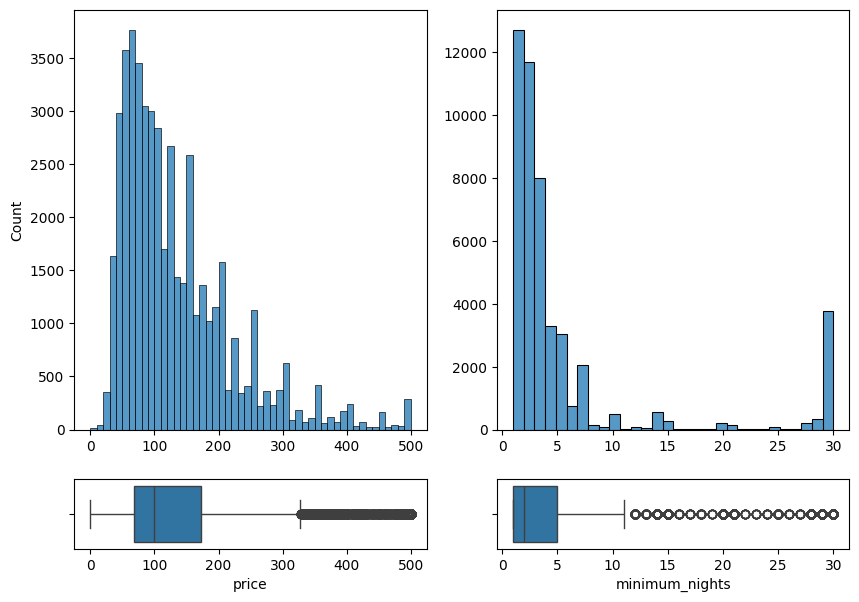

Estadísticas de price:
count    47851.000000
mean       131.530564
std         88.063220
min          0.000000
25%         68.000000
50%        100.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64
Estadísticas de minimum_nights:
count    48148.000000
mean         5.579692
std          8.203838
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64


In [116]:
# muestra los subplot 2x 2 
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

#Filtra los menores a 500 dolares
filtered_data = total_data[total_data['price'] <= 500]

# Creo una figura con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=filtered_data, x="price", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=filtered_data, x="price")

# Filtrando los menores a 30
min_nights_filtered = total_data[total_data['minimum_nights'] <= 30]
sns.histplot(ax=axis[0, 1], data=min_nights_filtered, x="minimum_nights", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=min_nights_filtered, x="minimum_nights")

# Mostrar el plot
plt.show()

print("Estadísticas de price:")
print(filtered_data['price'].describe())
print("Estadísticas de minimum_nights:")
print(min_nights_filtered['minimum_nights'].describe())

#Analisis De resultados:  --------------------------------------------------------------

Se puede ver el valor minimo, maximo, media, mediana , y los cuartiles. Esto  ayuda a confirmar lo que se ve en los gráficos.
Para price:
La mayoria de los precios estan en la parte baja del rango.
Para minimum_nights:
La mayoría de los valores son bajos, pero hay algunos alojamientos que exigen estancias más largas pero son valores atipicos.
Osea que:


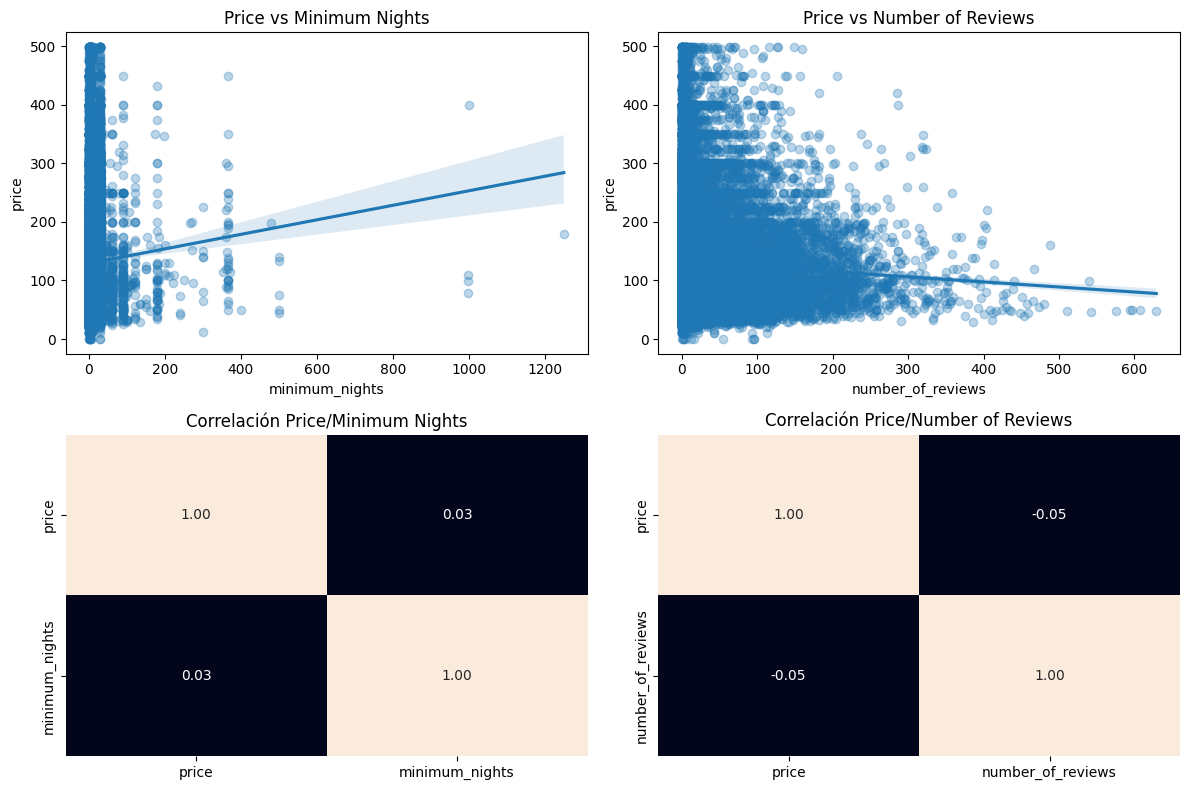

In [117]:
#ANALIS NUMERICO NUMERICO
# Filtrar precios extremos para mejor visualización
filtered_data = total_data[total_data['price'] < 500]

fig, axis = plt.subplots(2, 2, figsize=(12, 8))

# 1. price vs minimum_nights
sns.regplot(ax=axis[0, 0], data=filtered_data, x="minimum_nights", y="price", scatter_kws={'alpha':0.3})
axis[0, 0].set_title('Price vs Minimum Nights')
sns.heatmap(filtered_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title('Correlación Price/Minimum Nights')

# 2. price vs number_of_reviews
sns.regplot(ax=axis[0, 1], data=filtered_data, x="number_of_reviews", y="price", scatter_kws={'alpha':0.3})
axis[0, 1].set_title('Price vs Number of Reviews')
sns.heatmap(filtered_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title('Correlación Price/Number of Reviews')

plt.tight_layout()
plt.show()

#Analisis de resultados:

1. Price vs Minimum Nights
Diagrama de dispersión:
La mayoría de los alojamientos con precios bjos permiten estancias mínimas cortas 1-3 noches. A medida que aumenta el valor de minimum_nights, la dispersión de precios se mantiene, pero hay algunos outlyers con precios altos y estancias minimas largas
Mapa de calor de correlacion:
El coeficiente de correlación entre price y minimum_nights es cercano a 0,03 lo que confirma que no existe una relacion fuete entre ambas variables. exigir mas noches minimas no implica un precio mas alto
2. Price vs Number of Reviews
Diagrama de dispersión:
La mayoría de los alojamientos con muchos reviews tienen precios bajos o moderados. Los alojamientos con precios muy altos suelen tener pocos reviews, lo que sugiere que los alojamientos caros no son tan populares o llevan menos tiempo en la plataforma. No se observa una tendencia clara de que el precio aumente o disminuya con el número de reviews.
Mapa de calor de correlación:
El coeficiente de correlación entre price y number_of_reviews también es bajo cercano a 0, lo que indica que no hay una relación lineal significativa entre el precio y la cantidad de reseñas. Los alojamientos más populares no necesariamente son los más caros.

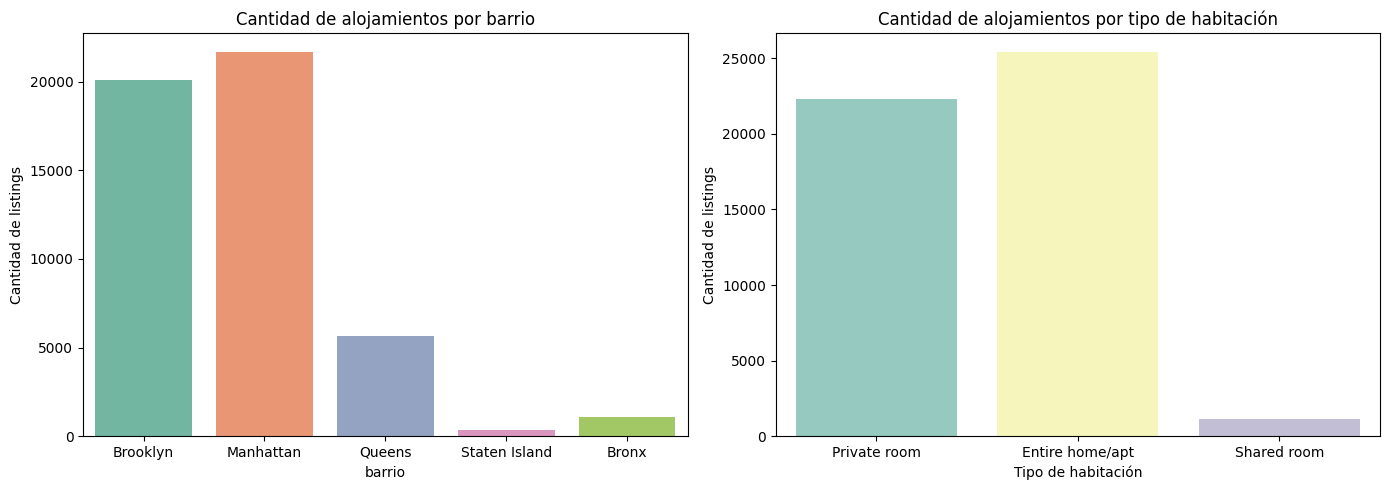

In [118]:
#ANALISIS CATEGORICO CATEGORICO 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barrios VS cantidad de listing
sns.countplot(ax=axes[0], data=total_data, x='neighbourhood_group', hue='neighbourhood_group', palette='Set2')
axes[0].set_title('Cantidad de alojamientos por barrio')
axes[0].set_xlabel('barrio')
axes[0].set_ylabel('Cantidad de listings')

# Tipo de habitación VS cantidad de listing
sns.countplot(ax=axes[1], data=total_data, x='room_type', hue='room_type', palette='Set3')
axes[1].set_title('Cantidad de alojamientos por tipo de habitación')
axes[1].set_xlabel('Tipo de habitación')
axes[1].set_ylabel('Cantidad de listings')

plt.tight_layout()
plt.show()


#Analisis de resultados:

1. Manhattan y Brooklyn son, los barios con mayor cantidad de alojamientos en Airbnb.
2. La mayoría de los alojamientos son de tipo "Entire home/apt" (casa o apartamento completo), lo que indica que muchos anfitriones ofrecen propiedades enteras en lugar de solo una habitación.
3. El segundo tipo más común es "Private room", que muestra que también hay una oferta significativa para quienes buscan compartir vivienda.
4. "Shared room" son mucho menos frecuentes, lo que indica que el alquiler para este tipo de alojamiento es baja

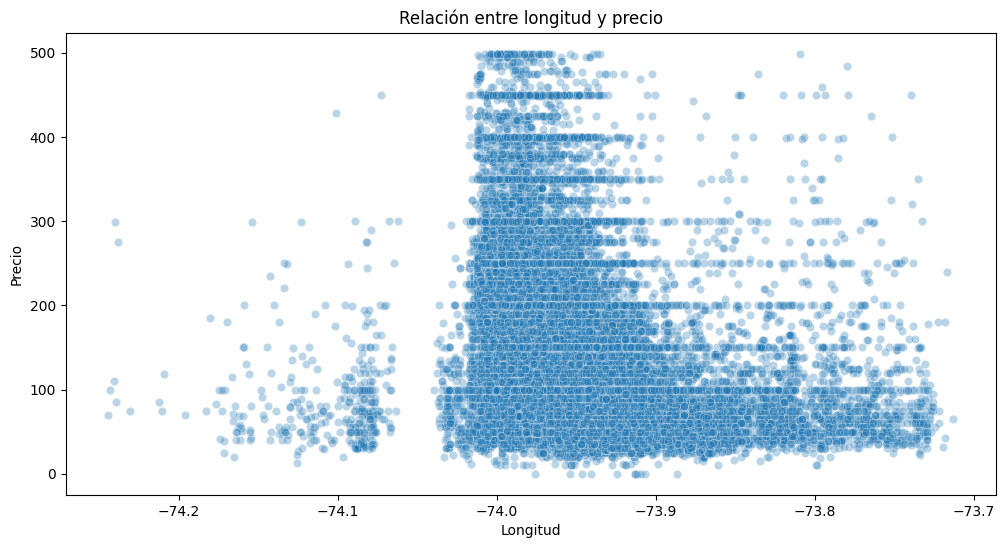

In [119]:
#analisis multivariante 

# Filtrar precios extremos para mejor visualización
filtered_data = total_data[total_data['price'] < 500]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='longitude', y='price', alpha=0.3)
plt.title('Relación entre longitud y precio')
plt.xlabel('Longitud')
plt.ylabel('Precio')
plt.show()



In [120]:
# GRUPO por neighbourhood_group y CALCULA LOS RANGOS DE LONGITUD
#longitude_ranges = total_data.groupby('neighbourhood_group
longitude_ranges=total_data.groupby('neighbourhood_group')['longitude'].agg(['min', 'max']).round(1)
longitude_ranges



,min,max
neighbourhood_group,,
Bronx,-73.9,-73.8
Brooklyn,-74.0,-73.9
Manhattan,-74.0,-73.9
Queens,-74.0,-73.7
Staten Island,-74.2,-74.1


#Analisis de resultados:

La ubicación geográfica (longitude) influye en el precio de los alojamientos, siendo las zonas centrales (especialmente Manhattan) las que concentran los precios mas altos, mientras que la periferia es mas economica.

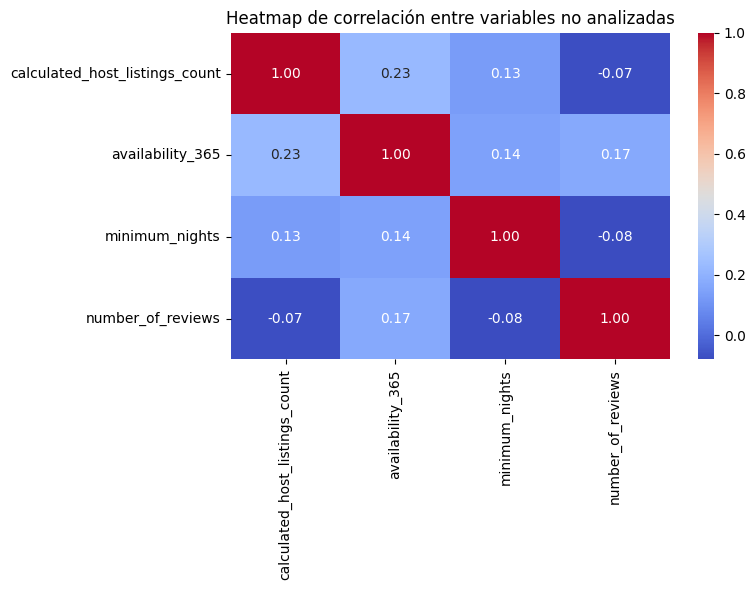

In [121]:
# ANALISIS DE MATRIZ CORRELACIONES NUMERICO CATEGORICA

# Variables analizadas
vars_to_analyze = [
    'calculated_host_listings_count',
    'availability_365',
    'minimum_nights',
    'number_of_reviews'
]

# Calculo de matriz de correlacion
corr_matrix = total_data[vars_to_analyze].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre variables no analizadas')
plt.tight_layout()
plt.show()

#Analisis de resultados:

1. calculated_host_listings_count vs. otras variables:
indica que el numero de alojamientos que tiene un host no está fuertemente relacionado ni con la disponibilidad, ni con el minimo de noches. 
2. availability_365 y number_of_reviews:
Hay una correlacion positiva debil. Esto sugiere que los alojamientos que están disponibles más dias al año reciben mas reseñas.
3. minimum_nights y las demás variables:Suele mostrar correlación negativa con number_of_reviews y availability_365. Los alojamientos que exigen estancias mínimas más largas suelen recibir menos reseñas y estar disponibles menos días.

Conclusión general:
Los alojamientos más disponibles suelen recibir más reviews.
Exigir estancias mínimas largas puede reducir la cantidad de reviews y la disponibilidad.


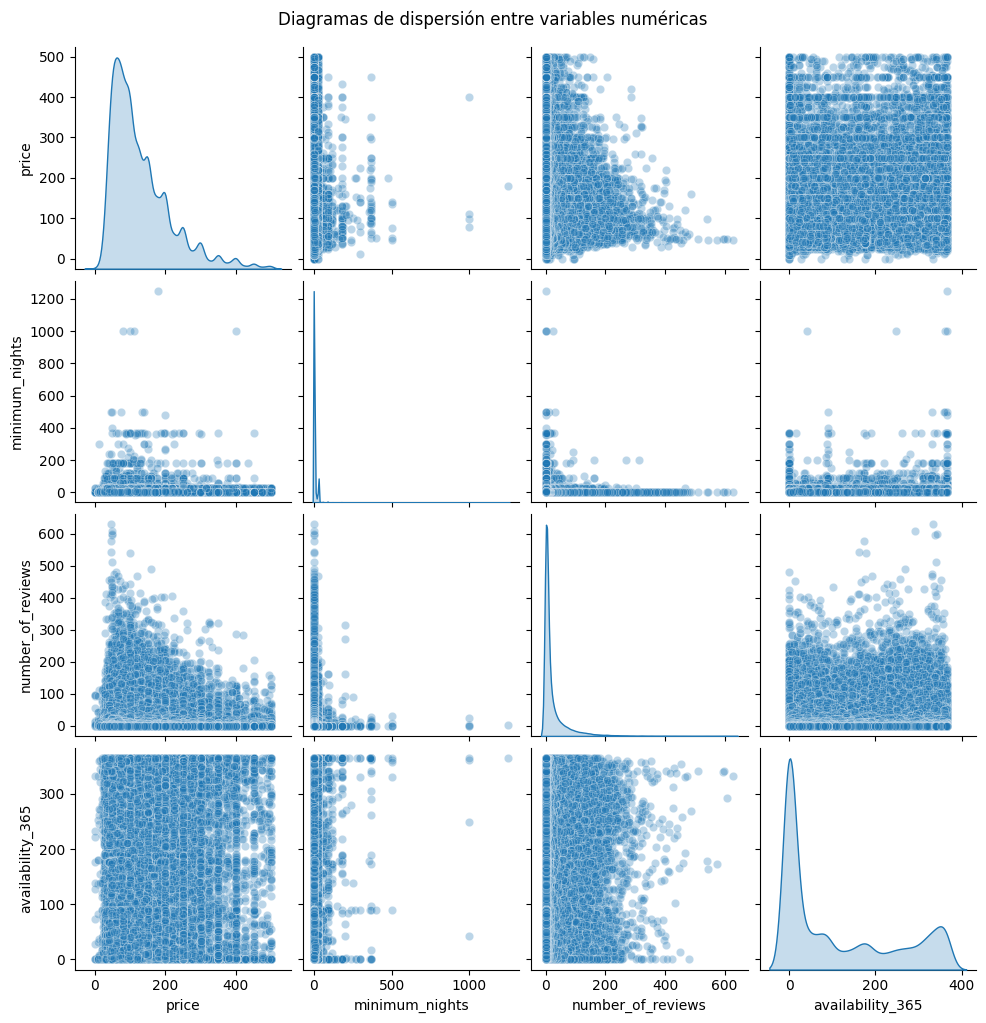

In [122]:
# todas las que creo se pueden cruzar
num_vars = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

# Filtrar precios extremos para mejor visualización (opcional)
filtered_data = total_data[total_data['price'] < 500]

# Pairplot para ver todas las combinaciones de scatter plots
sns.pairplot(filtered_data[num_vars], diag_kind='kde', plot_kws={'alpha':0.3})
plt.suptitle('Diagramas de dispersión entre variables numéricas', y=1.02)
plt.show()

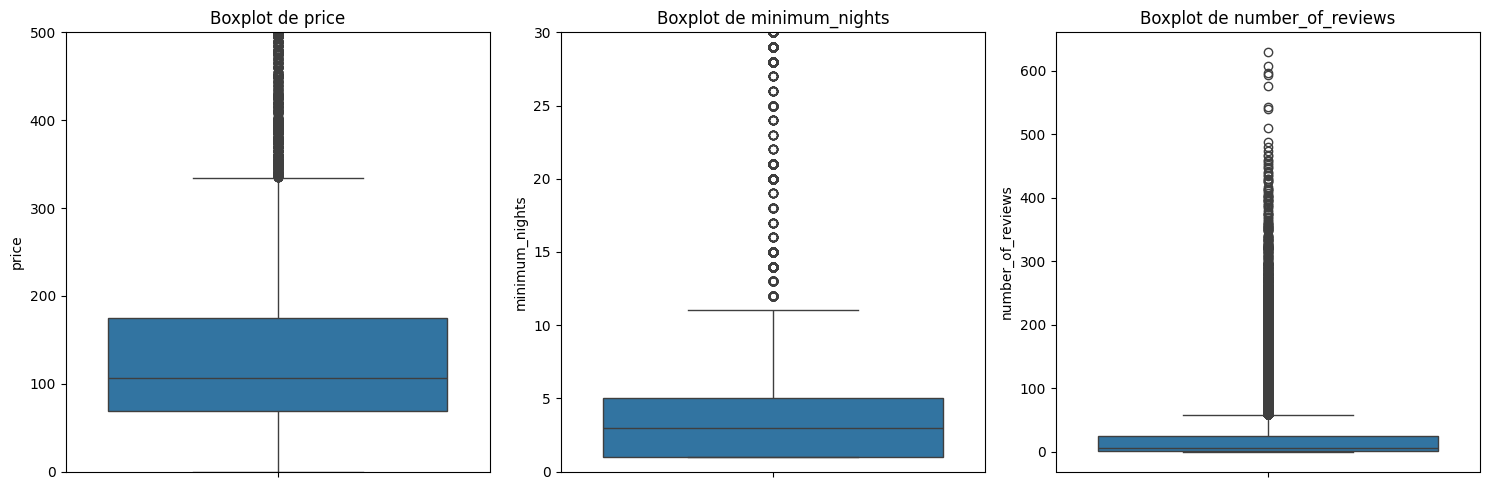

In [123]:
# 1 GRUPO variables con outlaiers
fig1, axes1 = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(ax=axes1[0], data=total_data, y="price")
axes1[0].set_title("Boxplot de price")
axes1[0].set_ylim(0, 500)  # Limitar price hasta 500

sns.boxplot(ax=axes1[1], data=total_data, y="minimum_nights")
axes1[1].set_title("Boxplot de minimum_nights")
axes1[1].set_ylim(0, 30)   # Limitar minimum_nights hasta 30

sns.boxplot(ax=axes1[2], data=total_data, y="number_of_reviews")
axes1[2].set_title("Boxplot de number_of_reviews")

plt.tight_layout()
plt.show()

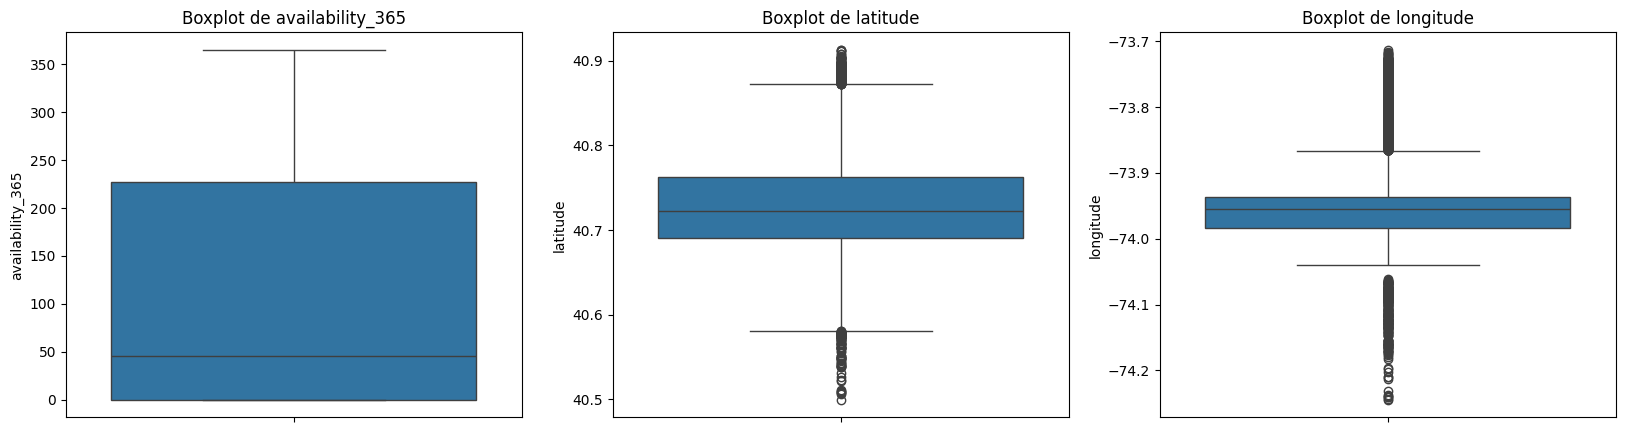

In [124]:
# 2 GRUPO variables con outliers
fig2, axes2 = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(ax=axes2[0], data=total_data, y="availability_365")
axes2[0].set_title("Boxplot de availability_365")
sns.boxplot(ax=axes2[1], data=total_data, y="latitude")
axes2[1].set_title("Boxplot de latitude")
sns.boxplot(ax=axes2[2], data=total_data, y="longitude")
axes2[2].set_title("Boxplot de longitude")

plt.show()

In [125]:
#Calcular los cuartiles y el IQR
Q1 = total_data['minimum_nights'].quantile(0.25)
Q3 = total_data['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el dataset sin outliers en minimum_nights
filtered_data = total_data[
    (total_data['minimum_nights'] >= lower_bound) &
    (total_data['minimum_nights'] <= upper_bound)
]

print(filtered_data.shape)
filtered_data.head()

(42288, 10)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


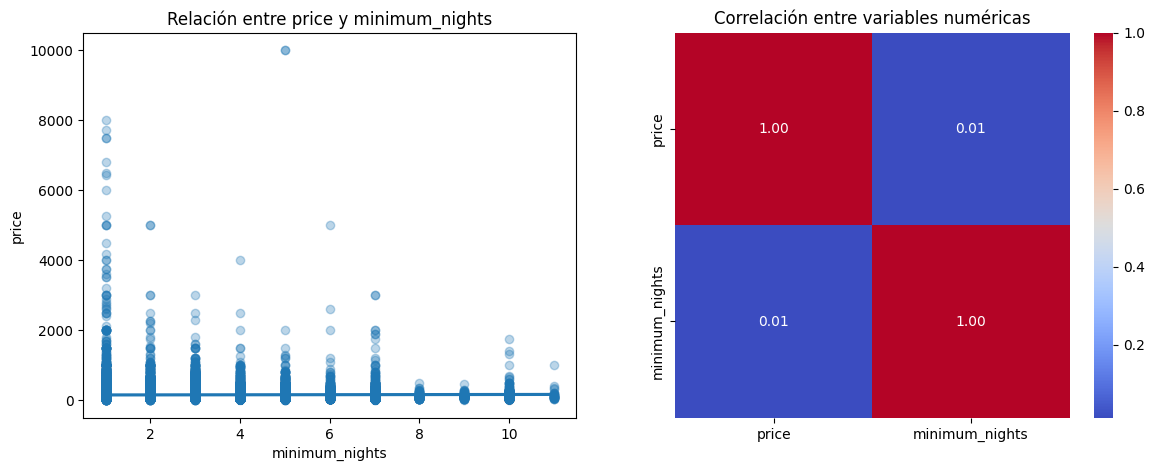

In [126]:
# GRAFICA DE DISPERSION Y CORRELACION NUMERICA 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Regplot entre price y minimum_nights
sns.regplot(
    ax=axes[0],
    data=filtered_data,
    x="minimum_nights",
    y="price",
    scatter_kws={'alpha':0.3}
)
axes[0].set_title("Relación entre price y minimum_nights")

#Heatmap de correlación entre variables numEricas
num_vars = ['price', 'minimum_nights']
corr = filtered_data[num_vars].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    ax=axes[1]
)
axes[1].set_title("Correlación entre variables numéricas")

plt.show()

#Analisis de resultados: 

No hay una relación lineal entre el precio y el mínimo de noches en los alojamientos como se pensaba por la aglomeracion de datos evaluando la variable con outlaiers

In [127]:
# CREO DATASET SIN OUTLAIERS (AJUSTANDO A LIMITES)
# Identificar columnas no categoricas o numericas
numerica = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                   'calculated_host_listings_count', 'availability_365']

# Función para ajustar outliers a los límites usando el método IQR
def cap_outliers_iqr(total_data, columns):
    total_data_clean = total_data.copy()
    
    for col in columns:
        Q1 = total_data_clean[col].quantile(0.25)
        Q3 = total_data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Ajusta outliers a los límites 
        total_data_clean[col] = total_data_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    return total_data_clean

# Creo el dataset con outliers ajustados a limites
total_data_no_outlaiers = cap_outliers_iqr(total_data, numerica)

print(f"Antes: {total_data.shape}")
print(f"Despues : {total_data_no_outlaiers.shape}") # asi verifico no me cabie el tamaño de la muestra
print(total_data_no_outlaiers.head())

Antes: (48895, 10)
Despues : (48895, 10)
  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                9.0                             3.5   
1    225               1               45.0                             2.0   
2    150               3                0.0                             1.0   
3     89               1               58.5                             1.0   
4     80              10                9.0                             1.0   

   availability_365  

In [128]:
#FACTORIZO LAS VARIABLES CATEGORICAS

# Creo una copia de total_data para factorizar
factorized_data_frame = total_data.copy()

# Factorizar las variables categóricas
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    factorized_data_frame[col], uniques = pd.factorize(factorized_data_frame[col])

print(factorized_data_frame)

       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                        0              0  40.64749  -73.97237          0   
1                        1              1  40.75362  -73.98377          1   
2                        1              2  40.80902  -73.94190          0   
3                        0              3  40.68514  -73.95976          1   
4                        1              4  40.79851  -73.94399          1   
...                    ...            ...       ...        ...        ...   
48890                    0              6  40.67853  -73.94995          0   
48891                    0             21  40.70184  -73.93317          0   
48892                    1              2  40.81475  -73.94867          1   
48893                    1              7  40.75751  -73.99112          2   
48894                    1              7  40.76404  -73.98933          0   

       price  minimum_nights  number_of_reviews  \
0        149            

In [129]:
#DATASET FACTORIZADO SIN OUTLAIERS
# Creo copia de total_data
factorized_data_frame = total_data.copy()

# Factorizar variables categóricas
for col in ['neighbourhood_group', 'neighbourhood', 'room_type']:
    factorized_data_frame[col], uniques = pd.factorize(factorized_data_frame[col])

# Ajustar outliers en las columnas numéricas
numericas = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
             'calculated_host_listings_count', 'availability_365']

def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

factorized_data_frame_no_outliers = cap_outliers_iqr(factorized_data_frame, numericas)
print(factorized_data_frame_no_outliers)

       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                        0              0  40.64749  -73.97237          0   
1                        1              1  40.75362  -73.98377          1   
2                        1              2  40.80902  -73.94190          0   
3                        0              3  40.68514  -73.95976          1   
4                        1              4  40.79851  -73.94399          1   
...                    ...            ...       ...        ...        ...   
48890                    0              6  40.67853  -73.94995          0   
48891                    0             21  40.70184  -73.93317          0   
48892                    1              2  40.81475  -73.94867          1   
48893                    1              7  40.75751  -73.99112          2   
48894                    1              7  40.76404  -73.98933          0   

       price  minimum_nights  number_of_reviews  \
0        149            

In [130]:
#TRAIN / TEST DATASET CON OUTLAIERS
# Separar features y target
X = total_data.drop('price', axis=1)
y = total_data['price']

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (39116, 9)
Tamaño de X_test: (9779, 9)
Tamaño de y_train: (39116,)
Tamaño de y_test: (9779,)


In [131]:
#TRAIN / TEST DATASET SIN OUTLAIERS

# Separo features y target
X = total_data_no_outlaiers.drop('price', axis=1)
y = total_data_no_outlaiers['price']

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (39116, 9)
Tamaño de X_test: (9779, 9)
Tamaño de y_train: (39116,)
Tamaño de y_test: (9779,)


In [132]:
# DATASET  TRAIN / TEST  CON OUTLAIERS FACTORIZADO

# Separo features y target
X = factorized_data_frame.drop('price', axis=1)
y = factorized_data_frame['price']

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (39116, 9)
Tamaño de X_test: (9779, 9)
Tamaño de y_train: (39116,)
Tamaño de y_test: (9779,)


In [133]:
# DATASET TRAIN / TEST  SIN OUTLAIERS FACTORIZADO

# Separo features y target
X = factorized_data_frame_no_outliers.drop('price', axis=1)
y = factorized_data_frame_no_outliers['price']

# Dividir en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (39116, 9)
Tamaño de X_test: (9779, 9)
Tamaño de y_train: (39116,)
Tamaño de y_test: (9779,)


In [134]:
# ESTANDARIZACION outlaiers

# Definir solo las columnas numéricas
numericas = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
             'calculated_host_listings_count', 'availability_365']

# Inicializar el scaler
scaler = StandardScaler()

# 1. Estandarizar solo columnas numéricas de total_data
total_data_scaled = total_data.copy()
total_data_scaled[numericas] = scaler.fit_transform(total_data_scaled[numericas])

# 2. Estandarizar solo columnas numéricas de total_data_no_outlaiers
total_data_no_outlaiers_scaled = total_data_no_outlaiers.copy()
total_data_no_outlaiers_scaled[numericas] = scaler.fit_transform(total_data_no_outlaiers_scaled[numericas])

print("total_data_scaled:")
print(total_data_scaled)

print("\ntotal_data_no_outlaiers_scaled:")
#print(total_data_no_outlaiers_scaled.head())
print(total_data_no_outlaiers_scaled)

total_data_scaled:
      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington -1.493849  -0.437652   
1               Manhattan             Midtown  0.452436  -0.684639   
2               Manhattan              Harlem  1.468399   0.222497   
3                Brooklyn        Clinton Hill -0.803398  -0.164450   
4               Manhattan         East Harlem  1.275660   0.177216   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant -0.924616   0.048089   
48891            Brooklyn            Bushwick -0.497141   0.411637   
48892           Manhattan              Harlem  1.573480   0.075821   
48893           Manhattan      Hell's Kitchen  0.523774  -0.843881   
48894           Manhattan      Hell's Kitchen  0.643525  -0.805100   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149       -0.293996          -0.320414   
1   

In [135]:
# ESTANDARIZADO factorizados
# Inicializar el scaler
scaler = StandardScaler()

# 1. Estandarizar factorized_data_frame (con outlaiers)
factorized_data_frame_scaled = pd.DataFrame(
    scaler.fit_transform(factorized_data_frame),
    columns=factorized_data_frame.columns
)

# 2. Estandarizar factorized_data_frame_no_outliers (sin outlaiers)
factorized_data_frame_no_outliers_scaled = pd.DataFrame(
    scaler.fit_transform(factorized_data_frame_no_outliers),
    columns=factorized_data_frame_no_outliers.columns
)

#print("factorized_data_frame_scaled:")
#print(factorized_data_frame_scaled)

#print("\nfactorized_data_frame_no_outliers_scaled:")
#print(factorized_data_frame_no_outliers_scaled)

In [136]:
# MIN / MAX outlaiers 
# Definir solo las columnas numéricas
numericas = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
             'calculated_host_listings_count', 'availability_365']

# Inicializar el scaler
scaler = MinMaxScaler()

# 1. Escalar solo columnas numericas de total_data
total_data_minmax = total_data.copy()
total_data_minmax[numericas] = scaler.fit_transform(total_data_minmax[numericas])

# 2. Escalar solo columnas numericas de total_data_no_outlaiers
total_data_no_outlaiers_minmax = total_data_no_outlaiers.copy()
total_data_no_outlaiers_minmax[numericas] = scaler.fit_transform(total_data_no_outlaiers_minmax[numericas])

print("total_data_minmax:")
print(total_data_minmax)

print("\ntotal_data_no_outlaiers_minmax:")
print(total_data_no_outlaiers_minmax)

total_data_minmax:
      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  0.357393   0.511921   
1               Manhattan             Midtown  0.614199   0.490469   
2               Manhattan              Harlem  0.748252   0.569257   
3                Brooklyn        Clinton Hill  0.448496   0.535649   
4               Manhattan         East Harlem  0.722820   0.565324   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  0.432502   0.554109   
48891            Brooklyn            Bushwick  0.488906   0.585684   
48892           Manhattan              Harlem  0.762117   0.556517   
48893           Manhattan      Hell's Kitchen  0.623612   0.476639   
48894           Manhattan      Hell's Kitchen  0.639412   0.480007   

             room_type  price  minimum_nights  number_of_reviews  \
0         Private room    149        0.000000           0.014308   
1   

In [137]:
# MIN / MAX Factorizados

# Inicializar el scaler
scaler = MinMaxScaler()

# 3. Escalar factorized_data_frame
factorized_data_frame_minmax = pd.DataFrame(
    scaler.fit_transform(factorized_data_frame),
    columns=factorized_data_frame.columns,
    index=factorized_data_frame.index
)

# 4. Escalar factorized_data_frame_no_outliers
factorized_data_frame_no_outliers_minmax = pd.DataFrame(
    scaler.fit_transform(factorized_data_frame_no_outliers),
    columns=factorized_data_frame_no_outliers.columns,
    index=factorized_data_frame_no_outliers.index
)

print("factorized_data_frame_minmax:")
print(factorized_data_frame_minmax)

print("\nfactorized_data_frame_no_outliers_minmax:")
print(factorized_data_frame_no_outliers_minmax)

factorized_data_frame_minmax:
       neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                     0.00       0.000000  0.357393   0.511921        0.0   
1                     0.25       0.004545  0.614199   0.490469        0.5   
2                     0.25       0.009091  0.748252   0.569257        0.0   
3                     0.00       0.013636  0.448496   0.535649        0.5   
4                     0.25       0.018182  0.722820   0.565324        0.5   
...                    ...            ...       ...        ...        ...   
48890                 0.00       0.027273  0.432502   0.554109        0.0   
48891                 0.00       0.095455  0.488906   0.585684        0.0   
48892                 0.25       0.009091  0.762117   0.556517        0.5   
48893                 0.25       0.031818  0.623612   0.476639        1.0   
48894                 0.25       0.031818  0.639412   0.480007        0.0   

        price  minimum_nights  number_of_revi

In [138]:
#DATASETS
total_data # dataset con outlaier
total_data_no_outlaiers #dataset sin outlaier
factorized_data_frame # dataset total_data factorizado con outlaiers
factorized_data_frame_no_outliers # dataset total_data factorizado sin outlaiers
# Dataset train / test con outlaier
# Dataset train / test sin outlaier
# Dataset train / test factorizado con outlaier
# Dataset train / test factorizado sin outlaier
total_data_scaled # dataset con outlaiers escalado 
total_data_no_outlaiers_scaled # dataset sin outlaiers escalado 
factorized_data_frame_scaled # dataset factorizado con outlaiers escalado
factorized_data_frame_no_outliers_scaled # dataset factorizado sin outlaiers escalado
total_data_minmax # dataset con outlaiers min / max
total_data_no_outlaiers_minmax # dataset sin outlaiers min / max
factorized_data_frame_minmax # dataset factorizado con outlaiers min / Max
factorized_data_frame_no_outliers_minmax # dataset factorizado sin outlaiers min / Max

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.00,0.000000,0.229105,0.432164,0.0,0.0149,0.0,0.153846,1.0,1.000000
1,0.25,0.004545,0.592490,0.371260,0.5,0.0225,0.0,0.769231,0.4,0.972603
2,0.25,0.009091,0.782177,0.594949,0.0,0.0150,0.2,0.000000,0.0,1.000000
3,0.00,0.013636,0.358017,0.499533,0.5,0.0089,0.0,1.000000,0.0,0.531507
4,0.25,0.018182,0.746191,0.583783,0.5,0.0080,0.9,0.153846,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
48890,0.00,0.027273,0.335385,0.551942,0.0,0.0070,0.1,0.000000,0.4,0.024658
48891,0.00,0.095455,0.415197,0.641588,0.0,0.0040,0.3,0.000000,0.4,0.098630
48892,0.25,0.009091,0.801796,0.558780,0.5,0.0115,0.9,0.000000,0.0,0.073973
48893,0.25,0.031818,0.605809,0.331993,1.0,0.0055,0.0,0.000000,1.0,0.005479
